In [5]:
pip install tensorflow numpy pandas matplotlib scikit-learn


In [7]:
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), header=None)
df.head()

Saving emnist-mnist-train.csv to emnist-mnist-train.csv
User uploaded file "emnist-mnist-train.csv" with length 116024334 bytes


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_cleaned=df.dropna()
print(df_cleaned)

       0    1    2    3    4    5    6    7    8    9    ...  775  776  777  \
0        4    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        4    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        6    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59995    5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59996    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59997    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59998    5    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

       778  779  780  781  782  783  784  
0       

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 37s 103ms/step - accuracy: 0.8513 - loss: 0.5111 - val_accuracy: 0.9744 - val_loss: 0.0868
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - accuracy: 0.9792 - loss: 0.0649 - val_accuracy: 0.9829 - val_loss: 0.0603
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.9862 - loss: 0.0420 - val_accuracy: 0.9856 - val_loss: 0.0467
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step - accuracy: 0.9895 - loss: 0.0340 - val_accuracy: 0.9869 - val_loss: 0.0431
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.9929 - loss: 0.0232 - val_accuracy: 0.9865 - val_loss: 0.0426
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9895 - loss: 0.0367
 Test Accuracy: 98.80%
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
 Predictions saved to cnn_char_predictions.csv


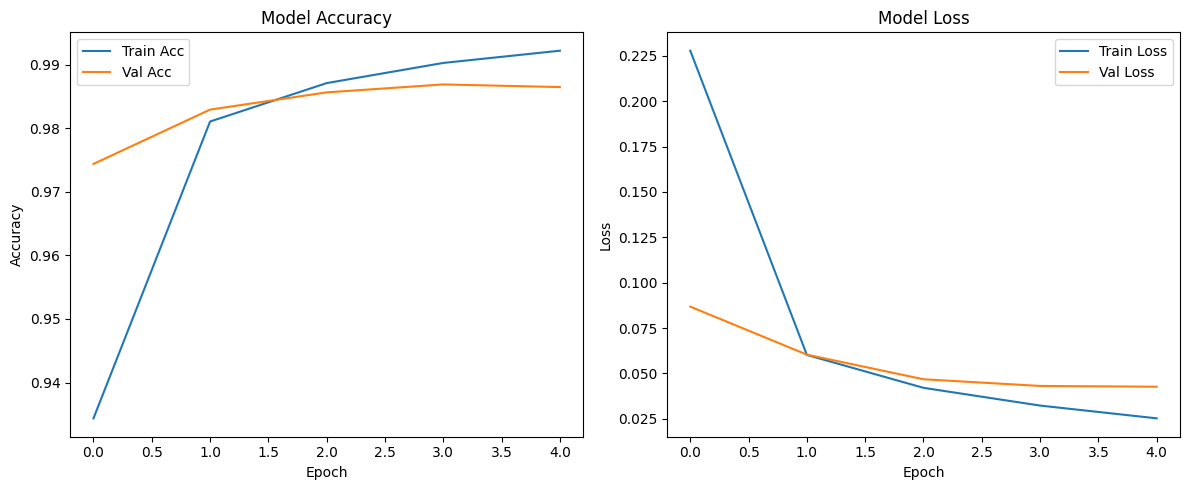

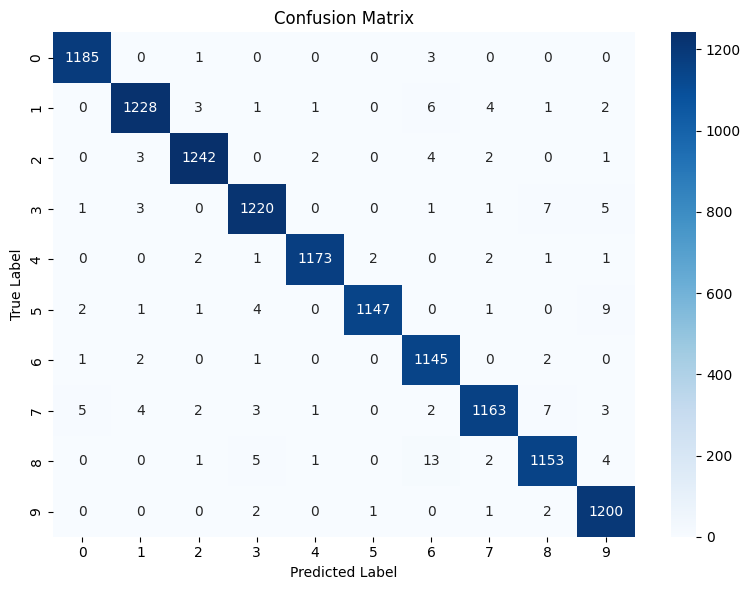

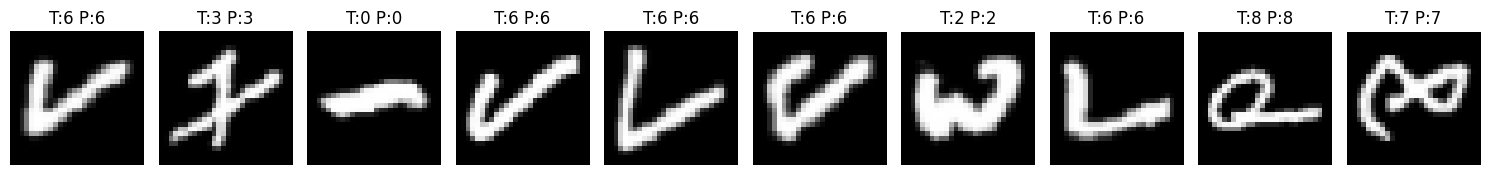


 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1189
           1       0.99      0.99      0.99      1246
           2       0.99      0.99      0.99      1254
           3       0.99      0.99      0.99      1238
           4       1.00      0.99      0.99      1182
           5       1.00      0.98      0.99      1165
           6       0.98      0.99      0.98      1151
           7       0.99      0.98      0.98      1190
           8       0.98      0.98      0.98      1179
           9       0.98      1.00      0.99      1206

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from google.colab import files
import io
y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values
X = X.reshape(-1, 28, 28, 1).astype("float32") / 255.0
num_classes = len(np.unique(y))
y = y - 1
y_cat = to_categorical(y, num_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f" Test Accuracy: {test_acc:.2%}")
y_test_labels = np.argmax(y_test, axis=1)
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
results = pd.DataFrame({'Actual': y_test_labels, 'Predicted': y_pred_labels})
results.to_csv("cnn_char_predictions.csv", index=False)
print(" Predictions saved to cnn_char_predictions.csv")
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
conf_mtx = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
def show_predictions(images, actual, predicted, count=10):
    plt.figure(figsize=(15, 2))
    for i in range(count):
        plt.subplot(1, count, i + 1)
        plt.imshow(images[i].reshape(28,28), cmap='gray')
        plt.title(f"T:{actual[i]} P:{predicted[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
show_predictions(X_test, y_test_labels, y_pred_labels)
print("\n Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))